In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [17]:
dataset = pd.read_csv('framingham.csv')
dataset.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Looking for duplications

In [18]:
dataset.duplicated().sum()

0

### Handling Outliers 

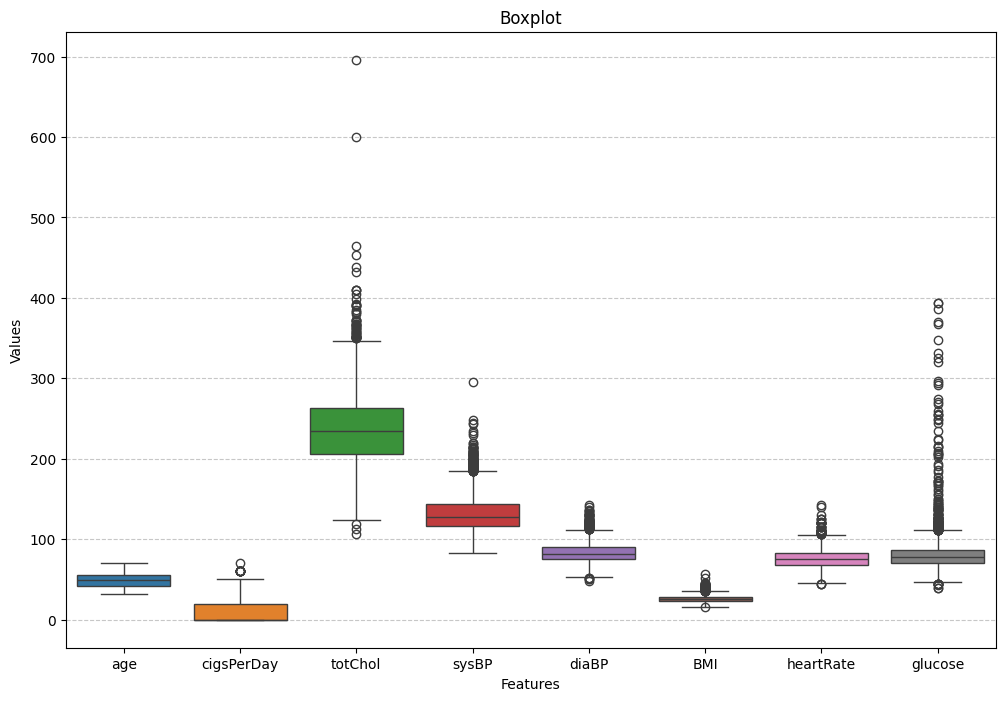

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])
plt.title('Boxplot')
plt.xlabel('Features')
plt.ylabel('Values')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In the context of heart disease, Cholestrol level, Blood Pressure, BMI, Heart Rate, glucose levels can be important indicators, and outliers in this could potentially represent individuals with unusual but relevant health conditions. 

In [20]:
# Using IQR to remove outlier
continuous_columns = ['age', 'cigsPerDay']

for each in continuous_columns:
    Q1 = dataset[each].quantile(0.25)
    Q3 = dataset[each].quantile(0.75)
    IQR= Q3-Q1
    max_b = (1.5 * IQR) + Q3
    min_b = Q1 - (1.5 * IQR)

    to_drop_index = dataset[each][(dataset[each] > max_b) | (dataset[each]< min_b)].index
    dataset.drop(to_drop_index, axis=0, inplace=True)

    print(f"Dropped {to_drop_index} : {max_b} | {min_b} : for column {each}")
    

Dropped Index([], dtype='int64') : 77.0 | 21.0 : for column age
Dropped Index([327, 721, 1054, 1452, 1468, 1488, 1849, 2709, 2710, 3008, 3673, 3928], dtype='int64') : 50.0 | -30.0 : for column cigsPerDay


### Handling Null Values

In [21]:
pd.DataFrame({
    'number of null': dataset.isnull().sum(),
    'type': dataset.dtypes
})

,number of null,type
male,0,int64
age,0,int64
education,104,float64
currentSmoker,0,int64
cigsPerDay,29,float64
BPMeds,53,float64
prevalentStroke,0,int64
prevalentHyp,0,int64
diabetes,0,int64
totChol,50,float64


**Handling null values for categorical variables by replacing them with the mode, and for numerical variables by replacing them with the mean.**

In [22]:
# Fill missing values with mode for categorical variables
mode_col = ['education', 'BPMeds']
for col in mode_col:
    mode_val = dataset[col].mode()[0]  # Mode may return multiple values, so we take the first one
    dataset[col] = dataset[col].fillna(mode_val)

# Fill missing values with mean for numerical variables
mean_col = ['cigsPerDay', 'totChol', 'BMI', 'glucose', 'heartRate']
for col in mean_col:
    mean_val = dataset[col].mean()
    dataset[col] = dataset[col].fillna(mean_val)

In [23]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Handling target column

In [24]:
target = dataset['TenYearCHD']
dataset.drop('TenYearCHD', axis=1, inplace=True)

### Dropping features with no further need

In [25]:
dataset.drop(columns=['education'], axis=1, inplace=True)

<br>

### Normalization

In [26]:
scaler = StandardScaler()
normalization = scaler.fit_transform(dataset)

target = target.reset_index(drop=True)
final_dataset = pd.DataFrame(normalization, columns=dataset.columns)
final_dataset['target'] = target

In [27]:
final_dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,1.157015,-1.234902,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,-0.939975,-1.195367,-1.082035,0.287438,0.342528,-0.217543,0
1,-0.864293,-0.418205,-0.985435,-0.765484,-0.173865,-0.077142,-0.670629,-0.162713,0.300692,-0.514986,-0.158456,0.719635,1.589522,-0.261279,0
2,1.157015,-0.184863,1.014780,0.963467,-0.173865,-0.077142,-0.670629,-0.162713,0.187904,-0.220155,-0.242418,-0.112835,-0.073137,-0.523697,0
3,-0.864293,1.331861,1.014780,1.827943,-0.173865,-0.077142,1.491138,-0.162713,-0.263248,0.800415,1.017008,0.682800,-0.904467,0.919604,1
4,-0.864293,-0.418205,1.014780,1.222810,-0.173865,-0.077142,-0.670629,-0.162713,1.090208,-0.106758,0.093429,-0.662904,0.758192,0.132348,0


In [28]:
final_dataset.to_csv("cleaned_data.csv", index=False)

<br>